<a href="https://colab.research.google.com/github/GeorgeSakketos/Data_Mining_Exercice_01/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Create Train 2023




Import Libraries and create file path shortcut

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium as fol
import re
import ast
import seaborn as sns
from wordcloud import WordCloud
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

filePath = '/content/gdrive/My Drive/Data_Mining_CSV/2023/'

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Pandas version 2.0.3


June


In [ ]:
#Read June CSV
filePath_june = filePath + 'june/'
june_listings_2023 = pd.read_csv(filePath_june + 'listings.csv', thousands = ',')

# Keep the Columns we want
june_listings_2023 = june_listings_2023[['id', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
                         'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price',
                         'availability_365', 'minimum_nights']]

june_listings_2023.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

# Add Month Column
june_listings_2023['month'] = 'june'

March


In [ ]:
# Read March CSV
filePath_march = filePath + 'march/'
march_listings_2023 = pd.read_csv(filePath_march + 'listings.csv', thousands = ',')

# Keep the Columns we want
march_listings_2023 = march_listings_2023[['id', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
                         'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price',
                         'availability_365', 'minimum_nights']]

march_listings_2023.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

# Add Month Column
march_listings_2023['month'] = 'march'

September


In [ ]:
# Read September CSV
filePath_september = filePath + 'september/'
september_listings_2023 = pd.read_csv(filePath_september + 'listings.csv', thousands = ',')

# Keep the Columns we want
september_listings_2023 = september_listings_2023[['id', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
                         'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price',
                         'availability_365', 'minimum_nights']]

september_listings_2023.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

# Add Month Column
september_listings_2023['month'] = 'september'

Combine Dataframes

In [ ]:
dfs = [june_listings_2023, march_listings_2023, september_listings_2023]

# Combine June, March and September into one Dataframe
final_df_2023 = pd.concat(dfs, ignore_index = True)

# Reset Index
final_df_2023 = final_df_2023.reset_index(drop=True)

Change 'host_has_profile' and 'host_identity_verified' depending there state. If a profile picture exists and the host is verified (not NaN) then change columns to True.

In [ ]:
convertColumns = ['host_has_profile_pic', 'host_identity_verified']
for col in convertColumns:
  final_df_2023[col] = final_df_2023[col].notna()

Change 'instant_bookable' from 't' and 'f' to True and False.

In [ ]:
final_df_2023.loc[final_df_2023['instant_bookable'] == 't', 'instant_bookable'] = True
final_df_2023.loc[final_df_2023['instant_bookable'] == 'f', 'instant_bookable'] = False

Correct NaN values on 'bathrooms' and convert them to 0 if NaN.

In [ ]:
final_df_2023['bathrooms'] = final_df_2023['bathrooms'].fillna(0)

Drop rows with missing data (NaN) and check for extremes on 'price' and 'accommodates'.

In [ ]:
# Drop NaN
final_df_2023 = final_df_2023.dropna()

# Use Gaussian Distributions to Find Extremes and Remove Theme
final_df_2023_copy = final_df_2023.copy()
final_df_2023_copy['price'] = final_df_2023_copy['price'].str.replace('$', '').str.replace(',', '')
final_df_2023_copy['price'] = final_df_2023_copy['price'].astype(float)

final_df_2023_copy['outlier_price'] = abs(final_df_2023_copy['price'] - final_df_2023_copy['price'].mean()) > 1.96*final_df_2023_copy['price'].std()
final_df_2023_copy['outlier_accommodates'] = abs(final_df_2023_copy['accommodates'] - final_df_2023_copy['accommodates'].mean()) > 1.96*final_df_2023_copy['accommodates'].std()

final_df_2023 = final_df_2023_copy[~final_df_2023_copy['outlier_price']]
final_df_2023 = final_df_2023_copy[~final_df_2023_copy['outlier_accommodates']]

final_df_2023 = final_df_2023.drop('outlier_price', axis=1)
final_df_2023 = final_df_2023.drop('outlier_accommodates', axis=1)

Display Final Dataframe

In [ ]:
pd.set_option('display.max_columns', None)
final_df_2023.head()

,id,bedrooms,beds,review_scores_rating,number_of_reviews,neighbourhood,name,latitude,longitude,last_review,instant_bookable,host_since,host_response_rate,host_identity_verified,host_has_profile_pic,first_review,description,bathrooms,accommodates,amenities,room_type,property_type,price,availability_365,minimum_nights,month
1,10990,1.0,1.0,4.80,65,ΑΜΠΕΛΟΚΗΠΟΙ,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37.989030,23.764480,2023-04-04,True,2009-09-08,100%,True,True,2012-09-06,Athens Quality Apartments - Deluxe apartment i...,0.0,4,"[""Coffee maker"", ""Hot water"", ""Bed linens"", ""E...",Entire home/apt,Entire rental unit,70.0,163,1,june
3,10995,1.0,2.0,4.80,30,ΑΜΠΕΛΟΚΗΠΟΙ,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37.989030,23.764480,2023-06-02,True,2009-09-08,100%,True,True,2010-07-08,"AQA No2 is 1-bedroom apartment (47m2), on the ...",0.0,4,"[""Coffee maker"", ""Hot water"", ""Bed linens"", ""E...",Entire home/apt,Entire rental unit,77.0,167,1,june
4,695173,2.0,3.0,4.88,233,ΝΕΟΣ ΚΟΣΜΟΣ,Condo in Athens · ★4.88 · 2 bedrooms · 3 beds ...,37.963410,23.728750,2023-03-08,True,2012-09-13,100%,True,True,2014-04-25,My unique artistic comfortable two bedroom apa...,0.0,5,"[""Coffee maker"", ""Hot water"", ""Dedicated works...",Entire home/apt,Entire condo,115.0,245,5,june
5,27262,1.0,1.0,4.81,21,ΑΜΠΕΛΟΚΗΠΟΙ,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37.989240,23.765000,2023-06-02,True,2009-09-08,100%,True,True,2012-09-21,Athens Quality Apartments - Ground floor apar...,0.0,2,"[""Fast wifi \u2013 50 Mbps"", ""Coffee maker"", ""...",Entire home/apt,Entire rental unit,100.0,176,1,june
6,28186,1.0,2.0,4.82,490,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Loft in Athens · ★4.82 · 1 bedroom · 2 beds · ...,37.976334,23.729834,2023-05-17,True,2010-05-09,100%,True,True,2012-05-21,TOP 5 REASONS to stay here<br />⭐️Don't waste ...,0.0,4,"[""Coffee maker"", ""Hot water"", ""Books and readi...",Entire home/apt,Entire loft,91.0,340,2,june


Export Final Dataframe as CSV

In [ ]:
final_df_2023.to_csv('/content/gdrive/My Drive/Data_Mining_CSV/2023/train_2023.csv', index = False)

Open Train 2023

In [ ]:
train_2023 = pd.read_csv(filePath + 'train_2023.csv')


Ερώτημα 1.1

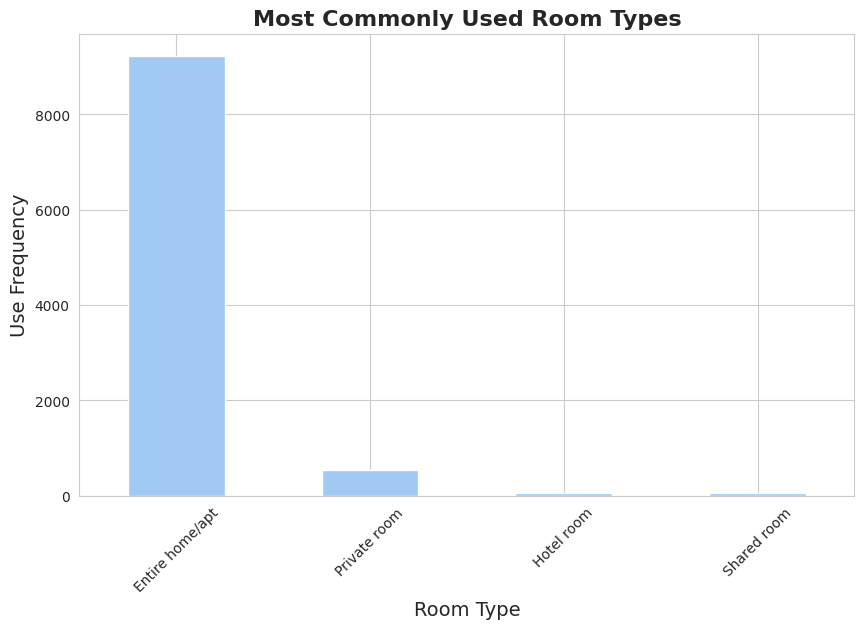

In [ ]:
# Remove Duplicates IDs
train_2023_no_dup = train_2023.drop_duplicates(subset = 'id')

# Count Room Types and Sort in Desc Order
room_type_count = train_2023_no_dup['room_type'].value_counts().sort_values(ascending=False)

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create Plot for Most Common Room Types
room_type_count.plot(kind='bar', figsize=(10, 6))

# Title and Labels
plt.title("Most Commonly Used Room Types", fontsize=16, fontweight='bold')
plt.xlabel("Room Type", fontsize=14)
plt.ylabel("Use Frequency", fontsize=14)

# Rotate x-axis label
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.2

month
june         101.145285
march         82.946441
september    101.308044
Name: price, dtype: float64


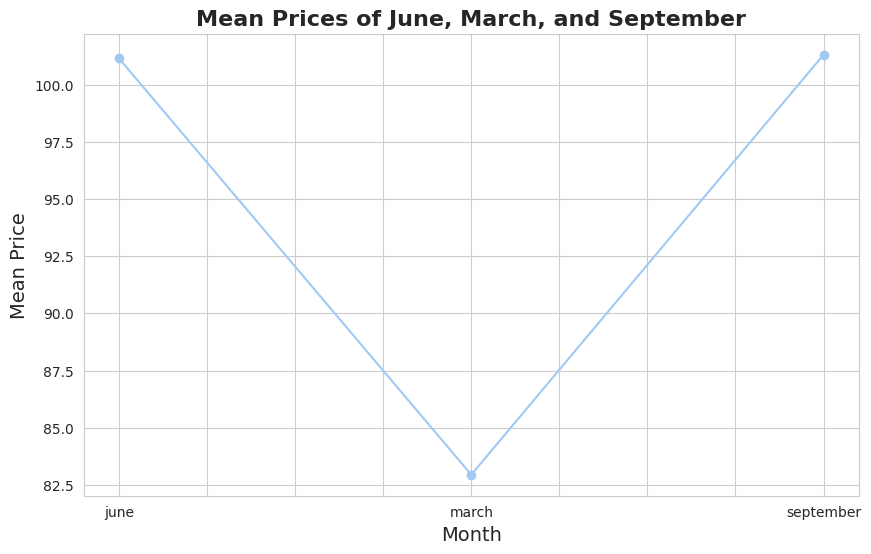

In [ ]:
# Find Mean Value
train_2023_mean = train_2023.groupby('month')['price'].mean()

print(train_2023_mean)

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create Plot for Mean Prices of June, March and September
train_2023_mean.plot(kind='line', marker='o', figsize=(10, 6))

# Title and Labels
plt.title("Mean Prices of June, March, and September", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Mean Price", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.3

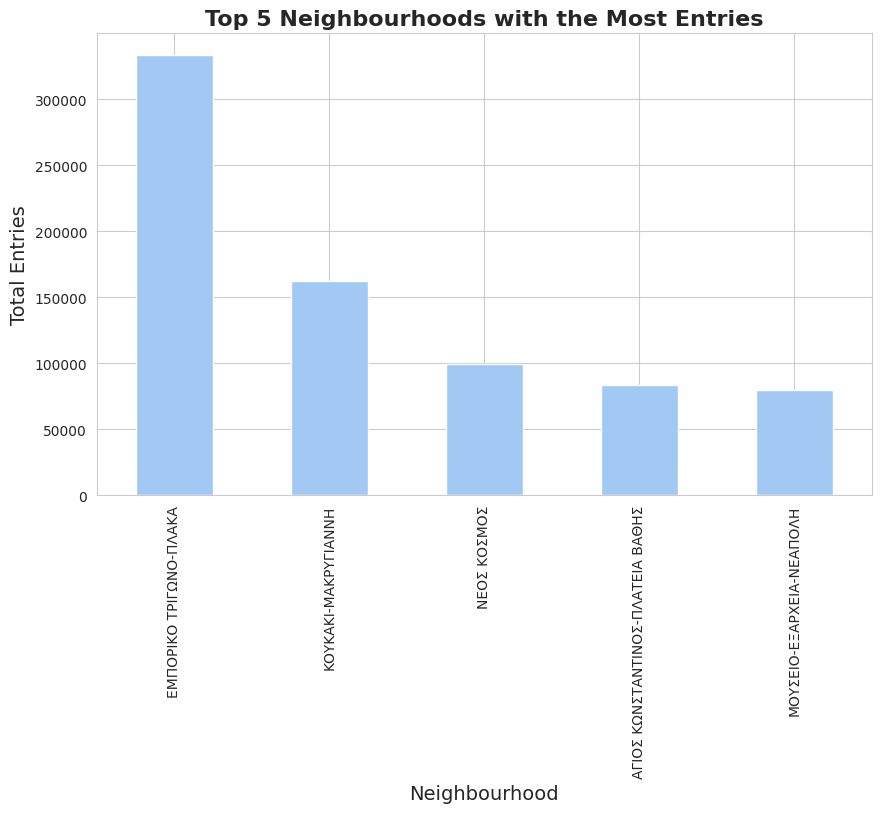

In [ ]:
# Apply unidecode to the 'neighbourhood' column
train_2023_copy = train_2023.copy()

# Group by 'neighbourhood' and sum up 'number_of_reviews', then select the top 5
top_5 = train_2023_copy.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(5)

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot Top 5 Neighbourhoods
top_5.plot(kind='bar', figsize=(10, 6))

# Title and Labels
plt.title("Top 5 Neighbourhoods with the Most Entries", fontsize=16, fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Total Entries", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.4

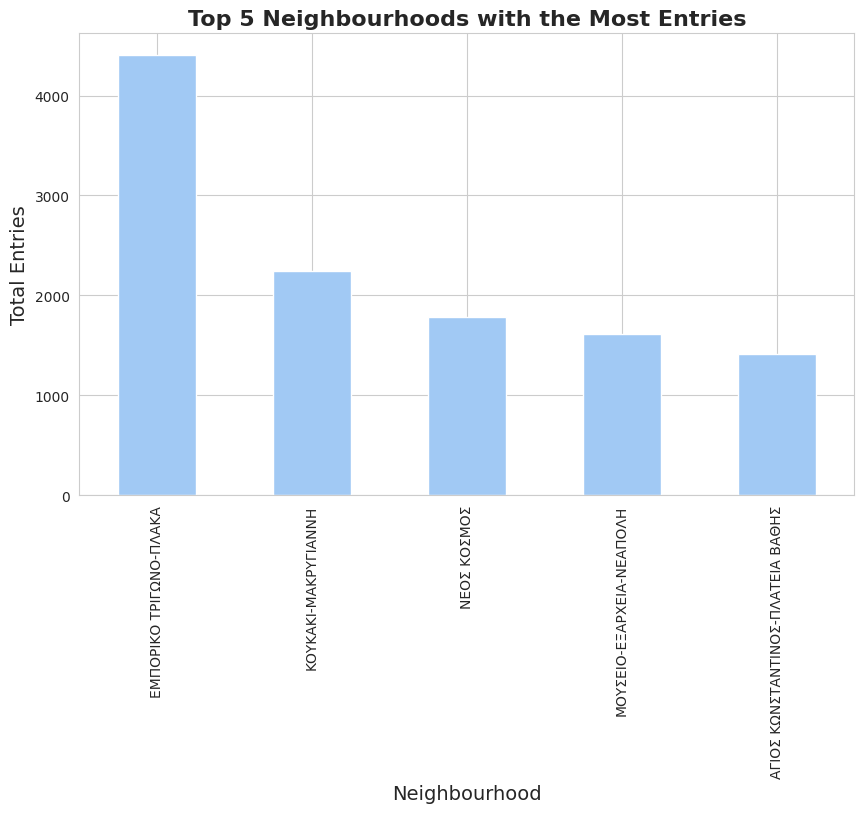

In [ ]:
# Group by Neighbourhood and count the number of reviews
number_of_entries = train_2023.groupby(train_2023['neighbourhood']).size()

# Sort by number of reviews and keep the top 5
top_neighbourhoods = number_of_entries.nlargest(5)

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot Top 5 Neighbourhoods
top_neighbourhoods.plot(kind='bar', figsize=(10, 6))

# Title and Labels
plt.title("Top 5 Neighbourhoods with the Most Entries", fontsize=16, fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Total Entries", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.5

In [ ]:
train_2023_copy = train_2023.copy()
neighbourhood_per_month = train_2023_copy.groupby(['neighbourhood', 'month']).size()

print(neighbourhood_per_month)

neighbourhood     month    
1Ο ΝΕΚΡΟΤΑΦΕΙΟ    june          26
                  march         30
                  september     36
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ  june          19
                  march         22
                              ... 
ΣΤΑΔΙΟ            march        139
                  september    161
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ   june          53
                  march         57
                  september     55
Length: 132, dtype: int64


Ερώτημα 1.6

<Figure size 1200x800 with 0 Axes>

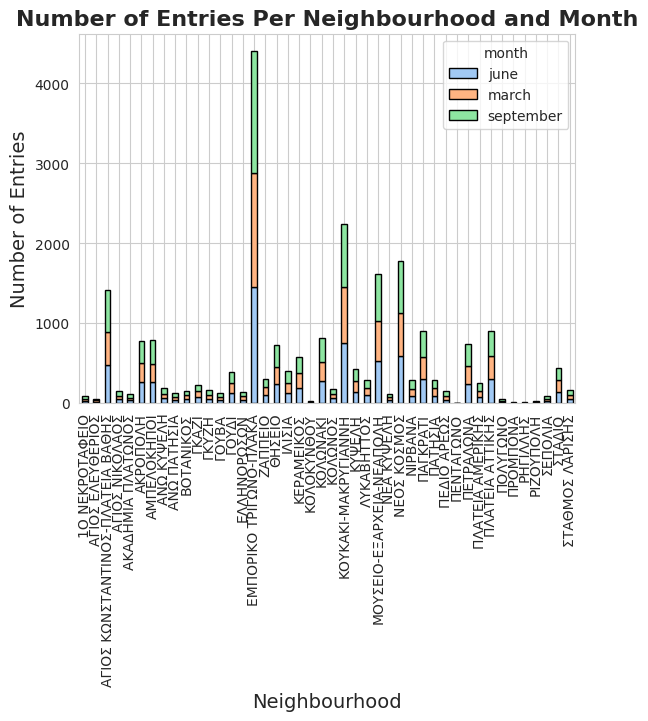

In [ ]:
train_2023_copy = train_2023.copy()
neighbourhood_per_month = train_2023_copy.groupby(['neighbourhood', 'month']).size()

# Split Data to have 'month' and 'neighbourhood' as seperate columns
neighbourhood = neighbourhood_per_month.unstack()

# Plot Histogram
plt.figure(figsize = (12, 8))
neighbourhood.plot(kind = 'bar', stacked = True, edgecolor = 'black')

# Title and Labels
plt.title("Number of Entries Per Neighbourhood and Month", fontsize=16, fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Number of Entries", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.7

In [ ]:
train_2023_copy = train_2023.copy()

# Counter for each Room Type
room_type_counts = train_2023_copy.groupby(['neighbourhood', 'room_type'])['id'].count()

most_used_room_type = room_type_counts.groupby(level = 0).idxmax()
most_used_room_type = most_used_room_type.apply(lambda x: x[1])

print(most_used_room_type)

neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      Entire home/apt
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    Entire home/apt
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    Entire home/apt
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      Entire home/apt
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   Entire home/apt
ΑΚΡΟΠΟΛΗ                            Entire home/apt
ΑΜΠΕΛΟΚΗΠΟΙ                         Entire home/apt
ΑΝΩ ΚΥΨΕΛΗ                          Entire home/apt
ΑΝΩ ΠΑΤΗΣΙΑ                         Entire home/apt
ΒΟΤΑΝΙΚΟΣ                           Entire home/apt
ΓΚΑΖΙ                               Entire home/apt
ΓΚΥΖΗ                               Entire home/apt
ΓΟΥΒΑ                               Entire home/apt
ΓΟΥΔΙ                               Entire home/apt
ΕΛΛΗΝΟΡΩΣΩΝ                         Entire home/apt
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              Entire home/apt
ΖΑΠΠΕΙΟ                             Entire home/apt
ΘΗΣΕΙΟ                              Entire home/apt
ΙΛΙΣΙΑ                              Entire home/ap

Ερώτημα 1.8

In [ ]:
train_2023_copy = train_2023.copy()

# Average Price per Room
average_price_per_room_type = train_2023_copy.groupby('room_type')['price'].mean()

# Most Expensive Room Type
most_expensive_room_type = average_price_per_room_type.idxmax()

print(most_expensive_room_type)

Hotel room


Ερώτημα 1.9

In [ ]:
# Month to use
target_month = 'march'
march_listings = train_2023[train_2023['month'] == target_month].head(30)

# Create Folium Map
athens_center = [37.9838, 23.7275]  # Coordinates for Athens
m = fol.Map(location=athens_center, zoom_start=12)

# Add markers for each listing
for index, row in march_listings.iterrows():
    # Check if host is verified
    host_verification = '✓' if row['host_identity_verified'] == 'True' else '✗'

    formatted_amenities = re.sub(r'[\[\]]', '', row['amenities'])

    popup_html = f"""
    <b>Host Identity Verified:</b> {host_verification}<br>
    <b>Bedrooms:</b> {row['bedrooms']}<br>
    <b>Beds:</b> {row['beds']}<br>
    <b>Host Response Rate:</b> {row['host_response_rate']}<br>
    <b>Number of Reviews:</b> {row['number_of_reviews']}<br>
    <b>Review Scores Rating:</b> {row['review_scores_rating']}<br>
    <b>Accommodates:</b> {row['accommodates']}<br>
    <b>Amenities:</b> {formatted_amenities}<br>
    <b>Room Type:</b> {row['room_type']}<br>
    <b>Price:</b> {row['price']}<br>
    """
    fol.Marker([row['latitude'], row['longitude']], popup=fol.Popup(popup_html, max_width=300)).add_to(m)

# Display the map
m.save('/content/gdrive/My Drive/Data_Mining_CSV/2023/march_2023_listings_map.html')
m

Ερώτημα 1.10

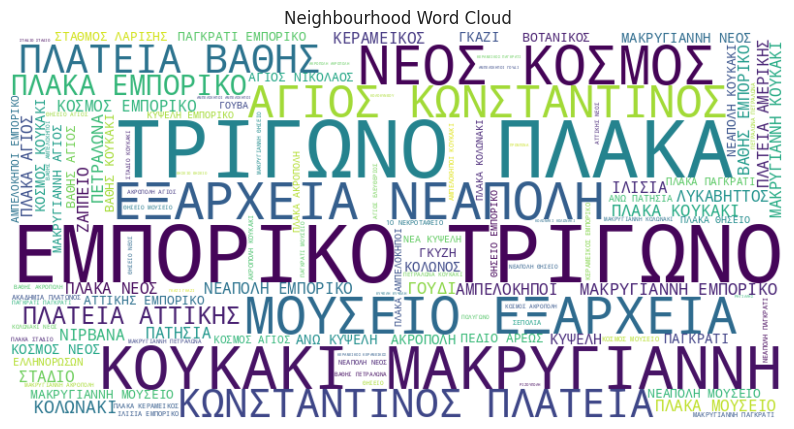

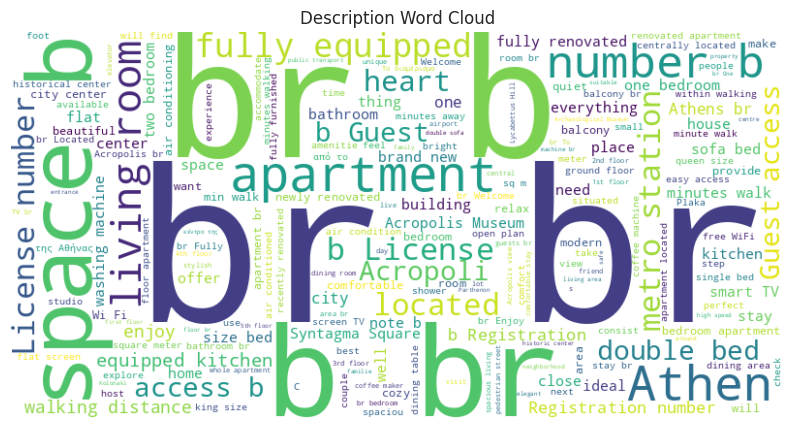

In [ ]:
# Concatenate all non-NaN entries into a single string for neighbourhood
neighbourhood_text = ' '.join(train_2023['neighbourhood'].dropna())

# Generate word cloud for neighbourhood
neighbourhood_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neighbourhood_text)

# Plot word cloud for neighbourhood
plt.figure(figsize=(10, 6))
plt.imshow(neighbourhood_wordcloud, interpolation='bilinear')
plt.title('Neighbourhood Word Cloud')
plt.axis('off')
plt.show()

# Concatenate all non-NaN entries into a single string for description
description_text = ' '.join(train_2023['description'].dropna())

# Generate word cloud for description
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

# Plot word cloud for description
plt.figure(figsize=(10, 6))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Description Word Cloud')
plt.axis('off')
plt.show()

Ερώτημα 1.11 (NOT DONE)


In [ ]:
for i in range(10, 20):
  print(train_2023['amenities'][i])

["Coffee maker", "Hot water", "Books and reading material", "Bed linens", "Wifi \u2013 18 Mbps", "Cleaning products", "Dedicated workspace", "Ethernet connection", "Beach essentials", "Elevator", "Portable fans", "Heating", "Hangers", "Dining table", "Extra pillows and blankets", "Private patio or balcony", "Refrigerator", "Baking sheet", "Hot water kettle", "? body soap", "40\" HDTV with standard cable", "Room-darkening shades", "Ceiling fan", "Essentials", "Cooking basics", "Oven", "Dishwasher", "Shower gel", "Free street parking", "Single level home", "Wine glasses", "Shampoo", "Long term stays allowed", "Dishes and silverware", "Hair dryer", "First aid kit", "Laundromat nearby", "Free washer \u2013 In unit", "Freezer", "Toaster", "Iron", "Park view", "Host greets you", "AC - split type ductless system", "Drying rack for clothing", "Kitchen", "Microwave", "Electric stove", "Clothing storage: closet and dresser"]
["Coffee maker", "Hot water", "Dedicated workspace", "Bed linens", "Ele

<Figure size 1200x800 with 0 Axes>

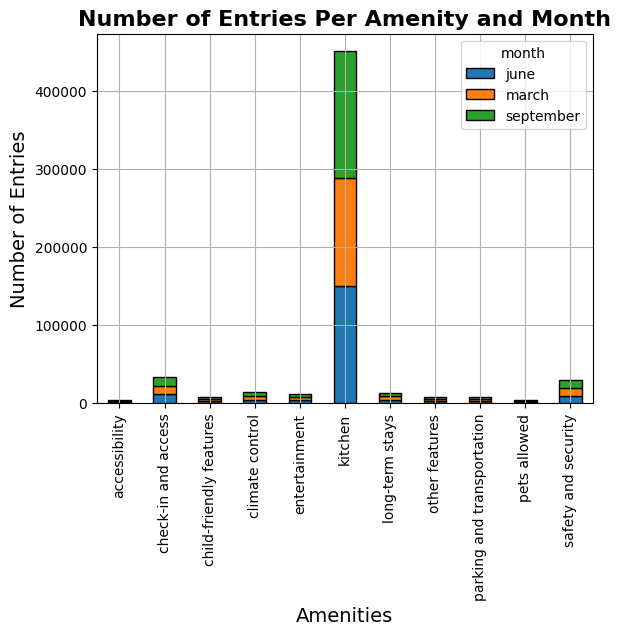

In [ ]:
# Mapping
mapping = {
    "kitchen": ["Coffee maker", "Hot water", "Books and reading material", "Bed linens", "Wifi", "Cleaning products", "Dedicated workspace", "Ethernet connection", "Beach essentials", "Elevator", "Portable fans", "Heating", "Hangers", "Dining table", "Extra pillows and blankets", "Private patio or balcony", "Refrigerator", "Baking sheet", "Hot water kettle", "Body soap", "HDTV", "Room-darkening shades", "Ceiling fan", "Cooking basics", "Oven", "Dishwasher", "Shower gel", "Free street parking", "Wine glasses", "Shampoo", "Dishes and silverware", "Hair dryer", "Iron", "Park view", "AC - split type ductless system", "Drying rack for clothing", "Kitchen", "Microwave", "Electric stove", "Clothing storage: closet and dresser", "Window AC unit", "BBQ grill", "Sea view", "Mountain view", "Outdoor dining area", "Backyard", "Bathtub", "Garden view", "Gas stove", "Fire pit", "Hammock"],
    "check-in and access": ["Self check-in", "Lockbox", "Host greets you", "Private entrance", "Keypad"],
    "parking and transportation": ["Free parking on premises", "Free street parking", "Luggage dropoff allowed"],
    "entertainment": ["HDTV with standard cable", "Children’s books and toys", "TV", "Fast wifi – 64 Mbps", "Pioneer sound system with aux", "Exercise equipment: free weights, yoga mat", "Bikes"],
    "climate control": ["Air conditioning", "Heating", "Ceiling fan"],
    "internet and connectivity": ["Wifi", "Ethernet connection"],
    "safety and security": ["Smoke alarm", "Carbon monoxide alarm", "Fire extinguisher", "Safe"],
    "child-friendly features": ["High chair", "Pack 'n play/Travel crib", "Crib", "Children’s dinnerware", "Toys"],
    "accessibility": ["Elevator", "Wheelchair accessible", "Single level home"],
    "pets allowed": ["Pets allowed"],
    "long-term stays": ["Long term stays allowed"],
    "other features": ["Ocean view", "City skyline view", "Courtyard view", "Park view", "Sea view", "Mountain view", "Garden view", "Backyard", "Bathtub", "Outdoor dining area", "Hammock", "Gas stove", "Fire pit", "BBQ grill", "Smoking allowed", "Breakfast"]
}

train_2023_copy = train_2023.copy()

# Cleaning
train_2023_copy['amenities'] = train_2023_copy['amenities'].str.strip('[]').str.replace("\"", "").str.split(',')

# Change each amenitie to it's corresponding category from mapping
train_2023_copy['amenities'] = train_2023_copy['amenities'].apply(lambda x: [next((category for category, items in mapping.items() if amenity.strip() in items), None) for amenity in x])

train_2023_copy = train_2023_copy.explode('amenities')
train_2023_copy = train_2023_copy.dropna(subset=['amenities'])
amenities_per_month = train_2023_copy.groupby(['amenities', 'month']).size()
per_month = amenities_per_month.unstack()

# Plot Histogram
plt.figure(figsize = (12, 8))
per_month.plot(kind = 'bar', stacked = True, edgecolor = 'black')

# Title and Labels
plt.title("Number of Entries Per Amenity and Month", fontsize=16, fontweight='bold')
plt.xlabel("Amenities", fontsize=14)
plt.ylabel("Number of Entries", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()